In [25]:
# Count the number of missing values for each column 
inputdf.isnull().sum()
# One - way frequency
inputdf['Yas'].value_counts()
inputdf['Yas'].describe()
inputdf=inputdf[inputdf['Yas']>17]

In [130]:
import pandas as pd
inputdf=pd.read_csv("C:\Files\Electricity_Fraud.csv")
pd.set_option("display.max_columns",None)
inputdf.isnull().sum()

Abone_No                  0
Kacak_Flag                0
Tarif                     0
TCKN NO                   0
Cinsiyet                  0
Yas                     177
Aile_Risk_Factor          0
Parch                     0
Sayac_Tip                 0
Toplam_Fatura_Tutari      0
dtype: int64

In [53]:
inputdf
inputdf.groupby(inputdf['Yas']).mean().Kacak_Flag
inputdf['Yas'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Yas, dtype: float64

In [54]:
# Yası <18 olanlar ve missing olanlar var. Bunların alalım ve ek bir datada birlestirip , kacak oranı nedir? 
inputdfk18=inputdf[inputdf['Yas']<18]
inputdfnull=inputdf[inputdf['Yas'].isnull()]
df3 = inputdfk18.append(inputdfnull, ignore_index=True)
#print(df3.mean().Kacak_Flag)
inputdfb18=inputdf[inputdf['Yas']>17]
print(inputdfb18.mean().Kacak_Flag)
print(inputdfk18.mean().Kacak_Flag)
print(inputdfnull.mean().Kacak_Flag)
inputdfb18['YAS_Kategori']="B18"
inputdfk18['YAS_Kategori']="K18"
inputdfnull['YAS_Kategori']="Null"
inputdf2 = inputdfk18.append(inputdfb18, ignore_index=True)
inputdf2 = inputdfnull.append(inputdf2, ignore_index=True)
inputdf2
# Impute missing age values
#inputdf2.describe()
# Median imputation #
#inputdf2=inputdf2['YAS_Kategori'].fillna("N18")




0.3810316139767055
0.5398230088495575
0.2937853107344633


<ipython-input-54-7905cc5b9889>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputdfb18['YAS_Kategori']="B18"
<ipython-input-54-7905cc5b9889>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputdfk18['YAS_Kategori']="K18"
<ipython-input-54-7905cc5b9889>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Abone_No  Kacak_Flag  Tarif      TCKN NO Cinsiyet   Yas  \
0           6           0      3  43429933850     male   NaN   
1          18           1      2  34411049154     male   NaN   
2          20           1      3  45767190761   female   NaN   
3          27           0      3  38468551804     male   NaN   
4          29           1      3  28891048349   female   NaN   
..        ...         ...    ...          ...      ...   ...   
886       886           0      3  34102991205   female  39.0   
887       887           0      2  27033784027     male  27.0   
888       888           1      1  31061515591   female  19.0   
889       890           1      1  32974535532     male  26.0   
890       891           0      3  44901529123     male  32.0   

     Aile_Risk_Factor  Parch Sayac_Tip  Toplam_Fatura_Tutari YAS_Kategori  
0                   0      0    330877                8.4583         Null  
1                   0      0    244373               13.0000         Null  
2                   0      0      2649                7.2250         Null  
3                   0      0      2631                7.2250         Null  
4                   0      0    330959                7.8792         Null  
..                ...    ...       ...                   ...          ...  
886                 0      5    382652               29.1250          B18  
887                 0      0    211536               13.0000          B18  
888                 0      0    112053               30.0000          B18  
889                 0      0    111369               30.0000          B18  
890                 0      0    370376                7.7500          B18  

[891 rows x 11 columns]

In [55]:
# Drop Yas
inputdf2=inputdf2.drop(['Yas'], axis=1)


In [76]:
# Select Variables
X=inputdf2[['Tarif','Cinsiyet','Aile_Risk_Factor','Toplam_Fatura_Tutari', 'YAS_Kategori']]
Target=inputdf2['Kacak_Flag']

In [66]:
# One -way Frequency
X['Tarif'].value_counts(dropna=False)
X['Cinsiyet'].value_counts(dropna=False)
X['YAS_Kategori'].value_counts(dropna=False)
X['Aile_Risk_Factor'].value_counts(dropna=False)
# Descriptive Stats
inputdf2['Toplam_Fatura_Tutari'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Toplam_Fatura_Tutari, dtype: float64

In [77]:
X['Tarif'].replace({1:"Mesken",2:"Ticrt",3: "TarımsalS"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [80]:
X=pd.get_dummies(X)

In [81]:
X

Aile_Risk_Factor  Toplam_Fatura_Tutari  Tarif_Mesken  Tarif_TarımsalS  \
0                   0                8.4583             0                1   
1                   0               13.0000             0                0   
2                   0                7.2250             0                1   
3                   0                7.2250             0                1   
4                   0                7.8792             0                1   
..                ...                   ...           ...              ...   
886                 0               29.1250             0                1   
887                 0               13.0000             0                0   
888                 0               30.0000             1                0   
889                 0               30.0000             1                0   
890                 0                7.7500             0                1   

     Tarif_Ticrt  Cinsiyet_female  Cinsiyet_male  YAS_Kategori_B18  \
0              0                0              1                 0   
1              1                0              1                 0   
2              0                1              0                 0   
3              0                0              1                 0   
4              0                1              0                 0   
..           ...              ...            ...               ...   
886            0                1              0                 1   
887            1                0              1                 1   
888            0                1              0                 1   
889            0                0              1                 1   
890            0                0              1                 1   

     YAS_Kategori_K18  YAS_Kategori_Null  
0                   0                  1  
1                   0                  1  
2                   0                  1  
3                   0                  1  
4                   0                  1  
..                ...                ...  
886                 0                  0  
887                 0                  0  
888                 0                  0  
889                 0                  0  
890                 0                  0  

[891 rows x 10 columns]

In [85]:
# Data Partition 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Target, test_size=0.33, random_state=16071981)

In [87]:
y_train

250    1
301    0
131    0
560    0
843    0
      ..
434    0
615    0
791    0
571    0
541    0
Name: Kacak_Flag, Length: 596, dtype: int64

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text

# Train the model with Dec Tree Classifier

Clf=DecisionTreeClassifier(criterion='gini', max_depth=3)


[Text(167.4, 190.26, 'X[6] <= 0.5\ngini = 0.468\nsamples = 596\nvalue = [373, 223]'),
 Text(83.7, 135.9, 'X[3] <= 0.5\ngini = 0.403\nsamples = 207\nvalue = [58, 149]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 28.856\ngini = 0.088\nsamples = 108\nvalue = [5, 103]'),
 Text(20.925, 27.180000000000007, 'gini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.034\nsamples = 58\nvalue = [1, 57]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 24.808\ngini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(104.625, 27.180000000000007, 'gini = 0.496\nsamples = 83\nvalue = [38, 45]'),
 Text(146.475, 27.180000000000007, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.308\nsamples = 389\nvalue = [315, 74]'),
 Text(209.25, 81.53999999999999, 'X[8] <= 0.5\ngini = 0.245\nsamples = 308\nvalue = [264, 44]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.194\nsamples = 267\nvalue = [2

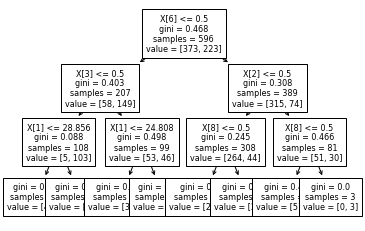

In [94]:
clf1=Clf.fit(X_train,y_train)
tree.plot_tree(clf1, fontsize=8)

In [97]:
feat_importance=pd.DataFrame(clf1.tree_.compute_feature_importances(normalize=False))
degiskenler=pd.DataFrame(X_train.columns.values)

In [98]:
degiskenler

0
0      Aile_Risk_Factor
1  Toplam_Fatura_Tutari
2          Tarif_Mesken
3       Tarif_TarımsalS
4           Tarif_Ticrt
5       Cinsiyet_female
6         Cinsiyet_male
7      YAS_Kategori_B18
8      YAS_Kategori_K18
9     YAS_Kategori_Null

In [99]:
feat_importance

0
0  0.000000
1  0.010712
2  0.011140
3  0.041456
4  0.000000
5  0.000000
6  0.127149
7  0.000000
8  0.012037
9  0.000000

In [100]:
mergeddf=degiskenler.merge(feat_importance, left_index=True, right_index=True)

In [101]:
mergeddf

0_x       0_y
0      Aile_Risk_Factor  0.000000
1  Toplam_Fatura_Tutari  0.010712
2          Tarif_Mesken  0.011140
3       Tarif_TarımsalS  0.041456
4           Tarif_Ticrt  0.000000
5       Cinsiyet_female  0.000000
6         Cinsiyet_male  0.127149
7      YAS_Kategori_B18  0.000000
8      YAS_Kategori_K18  0.012037
9     YAS_Kategori_Null  0.000000

In [103]:
print(export_text(clf1, feature_names=list(X_train.columns)))

|--- Cinsiyet_male <= 0.50
|   |--- Tarif_TarımsalS <= 0.50
|   |   |--- Toplam_Fatura_Tutari <= 28.86
|   |   |   |--- class: 1
|   |   |--- Toplam_Fatura_Tutari >  28.86
|   |   |   |--- class: 1
|   |--- Tarif_TarımsalS >  0.50
|   |   |--- Toplam_Fatura_Tutari <= 24.81
|   |   |   |--- class: 1
|   |   |--- Toplam_Fatura_Tutari >  24.81
|   |   |   |--- class: 0
|--- Cinsiyet_male >  0.50
|   |--- Tarif_Mesken <= 0.50
|   |   |--- YAS_Kategori_K18 <= 0.50
|   |   |   |--- class: 0
|   |   |--- YAS_Kategori_K18 >  0.50
|   |   |   |--- class: 0
|   |--- Tarif_Mesken >  0.50
|   |   |--- YAS_Kategori_K18 <= 0.50
|   |   |   |--- class: 0
|   |   |--- YAS_Kategori_K18 >  0.50
|   |   |   |--- class: 1



In [108]:
# Calculate Prob predictions of the DTModel
Train_probs=clf1.predict_proba(X_train)
Test_Probs=clf1.predict_proba(X_test)
Test_Forecasts=clf1.predict(X_test)

In [118]:
Test_Probs
Test_Probsdf=pd.DataFrame({'Prob0': Test_Probs[:,0], 'Prob1': Test_Probs[:,1]})
Test_Forecasts
Test_FCdf=pd.DataFrame(Test_Forecasts, columns=['Prediction'])

In [119]:
Test_FCdf

Prediction
0             0
1             0
2             0
3             0
4             1
..          ...
290           1
291           0
292           0
293           0
294           0

[295 rows x 1 columns]

In [112]:
Test_Probsdf

Prob0     Prob1
0    0.891386  0.108614
1    0.653846  0.346154
2    0.891386  0.108614
3    0.891386  0.108614
4    0.017241  0.982759
..        ...       ...
290  0.457831  0.542169
291  0.891386  0.108614
292  0.891386  0.108614
293  0.653846  0.346154
294  0.891386  0.108614

[295 rows x 2 columns]

In [113]:
X_test

Aile_Risk_Factor  Toplam_Fatura_Tutari  Tarif_Mesken  Tarif_TarımsalS  \
725                 0                8.4333             0                1   
733                 0               25.5875             1                0   
406                 1               15.5000             0                1   
80                  0                6.8583             0                1   
770                 0               49.5042             1                0   
..                ...                   ...           ...              ...   
763                 0               14.4542             0                1   
681                 0                7.1250             0                1   
488                 0                0.0000             0                1   
56                  0               27.7208             1                0   
856                 0                6.4375             0                1   

     Tarif_Ticrt  Cinsiyet_female  Cinsiyet_male  YAS_Kategori_B18  \
725            0                0              1                 1   
733            0                0              1                 1   
406            0                0              1                 1   
80             0                0              1                 0   
770            0                1              0                 1   
..           ...              ...            ...               ...   
763            0                1              0                 1   
681            0                0              1                 1   
488            0                0              1                 1   
56             0                0              1                 0   
856            0                0              1                 1   

     YAS_Kategori_K18  YAS_Kategori_Null  
725                 0                  0  
733                 0                  0  
406                 0                  0  
80                  0                  1  
770                 0                  0  
..                ...                ...  
763                 0                  0  
681                 0                  0  
488                 0                  0  
56                  0                  1  
856                 0                  0  

[295 rows x 10 columns]

In [125]:
# Indexleri resetleyelim
X_test=X_test.reset_index(drop=True)
X_test
y_test=y_test.reset_index(drop=True)

In [126]:
df_withmodeloutput=pd.merge(X_test, Test_Probsdf, right_index=True, left_index=True)
df_withmodeloutput=pd.merge(df_withmodeloutput, Test_FCdf, right_index=True, left_index=True)
df_withmodeloutput2=pd.merge(df_withmodeloutput, y_test , right_index=True, left_index=True)

In [127]:
df_withmodeloutput2

Aile_Risk_Factor  Toplam_Fatura_Tutari  Tarif_Mesken  Tarif_TarımsalS  \
0                   0                8.4333             0                1   
1                   0               25.5875             1                0   
2                   1               15.5000             0                1   
3                   0                6.8583             0                1   
4                   0               49.5042             1                0   
..                ...                   ...           ...              ...   
290                 0               14.4542             0                1   
291                 0                7.1250             0                1   
292                 0                0.0000             0                1   
293                 0               27.7208             1                0   
294                 0                6.4375             0                1   

     Tarif_Ticrt  Cinsiyet_female  Cinsiyet_male  YAS_Kategori_B18  \
0              0                0              1                 1   
1              0                0              1                 1   
2              0                0              1                 1   
3              0                0              1                 0   
4              0                1              0                 1   
..           ...              ...            ...               ...   
290            0                1              0                 1   
291            0                0              1                 1   
292            0                0              1                 1   
293            0                0              1                 0   
294            0                0              1                 1   

     YAS_Kategori_K18  YAS_Kategori_Null     Prob0     Prob1  Prediction  \
0                   0                  0  0.891386  0.108614           0   
1                   0                  0  0.653846  0.346154           0   
2                   0                  0  0.891386  0.108614           0   
3                   0                  1  0.891386  0.108614           0   
4                   0                  0  0.017241  0.982759           1   
..                ...                ...       ...       ...         ...   
290                 0                  0  0.457831  0.542169           1   
291                 0                  0  0.891386  0.108614           0   
292                 0                  0  0.891386  0.108614           0   
293                 0                  1  0.653846  0.346154           0   
294                 0                  0  0.891386  0.108614           0   

     Kacak_Flag  
0             0  
1             0  
2             0  
3             0  
4             1  
..          ...  
290           0  
291           0  
292           0  
293           0  
294           0  

[295 rows x 14 columns]

In [128]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(df_withmodeloutput2['Kacak_Flag'],df_withmodeloutput2['Prob1']))


0.8612251718869366


In [ ]:
# Regression Algorithm 

In [ ]:
# Fatura tutarindan yas bilgisini tahmin eden bir model gelistirelim 

In [140]:
import pandas as pd
inputdf=pd.read_csv("C:\Files\Electricity_Fraud.csv")
pd.set_option("display.max_columns",None)
inputdf.isnull().sum()
yas_temiz=inputdf.dropna()

In [132]:
corrmatrix=inputdf.corr()

In [149]:
yas_temiz
Yas=yas_temiz[['Yas']]
Fatura_Tutari=yas_temiz[['Toplam_Fatura_Tutari']]

In [150]:
Fatura_Tutari



Toplam_Fatura_Tutari
0                  7.2500
1                 71.2833
2                  7.9250
3                 53.1000
4                  8.0500
..                    ...
885               29.1250
886               13.0000
887               30.0000
889               30.0000
890                7.7500

[714 rows x 1 columns]

In [151]:
from sklearn.linear_model import LinearRegression
SLR=LinearRegression(fit_intercept=True)
Model=SLR.fit(Fatura_Tutari,Yas)

In [152]:
# The coefficients
print('Coefficients: \n', Model.intercept_)
print('Coefficients: \n', Model.coef_)

Coefficients: 
 [28.78419685]
Coefficients: 
 [[0.02637076]]


In [158]:
inputdf['duz_yas']=inputdf['Yas'].fillna(28.7842+inputdf['Toplam_Fatura_Tutari']*0.02637076)

In [164]:
inputdf
inputdf['Tarif'].replace({1:"Mesken",2:"Ticrt",3: "TarımsalS"}, inplace=True)

In [165]:
# Select Variables
X=inputdf[['Tarif','Cinsiyet','Aile_Risk_Factor','Toplam_Fatura_Tutari', 'duz_yas']]
Target=inputdf['Kacak_Flag']
X=pd.get_dummies(X)

In [166]:
X

Aile_Risk_Factor  Toplam_Fatura_Tutari    duz_yas  Tarif_Mesken  \
0                   1                7.2500  22.000000             0   
1                   1               71.2833  38.000000             1   
2                   0                7.9250  26.000000             0   
3                   1               53.1000  35.000000             1   
4                   0                8.0500  35.000000             0   
..                ...                   ...        ...           ...   
886                 0               13.0000  27.000000             0   
887                 0               30.0000  19.000000             1   
888                 1               23.4500  29.402594             0   
889                 0               30.0000  26.000000             1   
890                 0                7.7500  32.000000             0   

     Tarif_TarımsalS  Tarif_Ticrt  Cinsiyet_female  Cinsiyet_male  
0                  1            0                0              1  
1                  0            0                1              0  
2                  1            0                1              0  
3                  0            0                1              0  
4                  1            0                0              1  
..               ...          ...              ...            ...  
886                0            1                0              1  
887                0            0                1              0  
888                1            0                1              0  
889                0            0                0              1  
890                1            0                0              1  

[891 rows x 8 columns]

In [167]:
# Data Partition 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Target, test_size=0.33, random_state=16071981)

In [171]:
y_train

250    0
301    1
131    0
560    0
843    0
      ..
434    0
615    1
791    0
571    1
541    0
Name: Kacak_Flag, Length: 596, dtype: int64

In [174]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0, solver='liblinear')
model=clf.fit(X_train, y_train)



In [175]:
# The coefficients
print('Coefficients: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Coefficients: 
 [0.69102661]
Coefficients: 
 [[-0.35959138  0.00227425 -0.03633244  1.448172   -0.95259917  0.19545379
   1.67855758 -0.98753097]]
